<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/covid_19_V1_2_lightGBM_Martin_move.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [1]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!rm -r curated_data
!rm meta_data_cap.csv
!rm meta_data_covid.csv
!rm meta_data_normal.csv

In [3]:
%cd /content/

# !unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip'

!unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' meta_data_normal.csv meta_data_covid.csv meta_data_cap.csv


/content
Archive:  /content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip
  inflating: meta_data_cap.csv       
  inflating: meta_data_covid.csv     
  inflating: meta_data_normal.csv    


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data as dataframes
df_meta_cap = pd.read_csv('meta_data_cap.csv')
df_meta_covid = pd.read_csv('meta_data_covid.csv', encoding = "ISO-8859-1")
df_meta_normal = pd.read_csv('meta_data_normal.csv')

### Analysis of df_meta_cap

In [7]:
# Get some information about df_meta_cap
print(df_meta_cap.info())
display(df_meta_cap.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2618 non-null   int64  
 1   File name                    2618 non-null   object 
 2   Patient ID                   2618 non-null   object 
 3   Slices_x                     2618 non-null   int64  
 4   Columns                      2618 non-null   int64  
 5   Date of Last Calibration     2618 non-null   int64  
 6   Diagnosis                    2618 non-null   object 
 7   Distance Source to Detector  2618 non-null   int64  
 8   Distance Source to Patient   2618 non-null   int64  
 9   Exposure Time                2618 non-null   int64  
 10  KVP                          2618 non-null   int64  
 11  Age                          2618 non-null   int64  
 12  Gender                       2618 non-null   object 
 13  Rows              

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country
0,0,cap006_10.png,cap006,10,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
1,1,cap006_11.png,cap006,11,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
2,2,cap006_12.png,cap006,12,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
3,3,cap006_14.png,cap006,14,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
4,4,cap006_15.png,cap006,15,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran


In [8]:
df_meta_cap.loc[df_meta_cap.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country


In [9]:
df_meta_cap['Country'].unique()     # unique countries

array(['Iran'], dtype=object)

In [10]:
df_meta_cap['Patient ID'].nunique() # number of unique patients

54

In [11]:
df_meta_cap['Age'].unique()         # unique ages

array([71, 54, 38, 68, 84, 65, 94, 44, 29, 87, 13, 59, 40, 52, 34, 22, 32,
       25, 80, 46, 70, 21, 51, 30, 26, 76, 56, 62, 77, 75, 39, 83, 48, 73,
       74, 55, 93, 37, 89, 58, 67, 12])

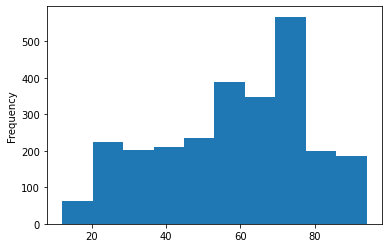

In [12]:
# Display age distribution
df_meta_cap.Age.plot(kind='hist')
plt.show()

### Analysis of df_meta_covid

In [13]:
df_meta_covid.loc[df_meta_covid.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu


In [14]:
# Get some information about df_meta_covid
print(df_meta_covid.info())
display(df_meta_covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7593 non-null   int64  
 1   File name                    7593 non-null   object 
 2   Patient ID                   7593 non-null   object 
 3   Gender                       7593 non-null   object 
 4   Age                          7593 non-null   object 
 5   Country                      7593 non-null   object 
 6   Diagnosis                    7593 non-null   object 
 7   Slice                        7210 non-null   float64
 8   Case Discussion              493 non-null    object 
 9   Case Number                  1944 non-null   object 
 10  Columns                      3815 non-null   float64
 11  Date                         4491 non-null   object 
 12  Date of Last Calibration     3815 non-null   float64
 13  Distance Source to

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu
0,0,6_Rahimzadeh_137covid_patient101_SR_4_IM00006.png,patient101,F,51,Iran,COVID-19,6.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6_Rahimzadeh_137covid_patient101_SR_4_IM00008.png,patient101,F,51,Iran,COVID-19,8.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6_Rahimzadeh_137covid_patient101_SR_4_IM00009.png,patient101,F,51,Iran,COVID-19,9.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6_Rahimzadeh_137covid_patient101_SR_4_IM00010.png,patient101,F,51,Iran,COVID-19,10.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6_Rahimzadeh_137covid_patient101_SR_4_IM00011.png,patient101,F,51,Iran,COVID-19,11.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_meta_covid['Country'].unique()     # unique countries

array(['Iran', 'Italy', 'China', '-', 'Turkey', 'Ukraine', 'Belgium',
       'South Korea', 'Taiwan', 'Spain', 'Portugal', 'Greece', 'Russia',
       'Japan'], dtype=object)

In [16]:
df_meta_covid['Patient ID'].nunique() # number of unique patients

464

## Christoph: Train-Test-Split

In [17]:
from timeit import default_timer as timer
start = timer()

In [18]:
# !ls curated_data/curated_data/1NonCOVID/
# !ls curated_data/curated_data/2COVID/
# !ls curated_data/curated_data/3CAP/

np.random.seed(13)

# Configuration of sizes
test_size = 0.1
validation_size = 0.1
train_size = 1 - test_size - validation_size


In [19]:


# 1NonCOVID - df_meta_normal

# Define lists and length of train, test, split sets
patient_ids_noncovid_all = df_meta_normal['Patient ID'].unique()
len_noncovid_all = len(patient_ids_noncovid_all)

# Test set
print(f"len patient_ids_noncovid_all: {len_noncovid_all}")
len_noncovid_test = int(len_noncovid_all // (1 / test_size))
patient_ids_noncovid_test = np.random.choice(patient_ids_noncovid_all, len_noncovid_test, replace=False)
patient_ids_remaining = list(set(patient_ids_noncovid_all) - set(patient_ids_noncovid_test))
print(f"len patient_ids_noncovid_test: {len_noncovid_test}, {len(patient_ids_noncovid_test)}")
# Validation set
len_noncovid_validation = int(len_noncovid_all // (1 / validation_size))
patient_ids_noncovid_validation = np.random.choice(patient_ids_remaining, len_noncovid_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_noncovid_validation))
print(f"len patient_ids_noncovid_validation: {len_noncovid_validation}, {len(patient_ids_noncovid_validation)}")
# Train set
len_noncovid_train = len_noncovid_all - len_noncovid_test - len_noncovid_validation
patient_ids_noncovid_train = patient_ids_remaining
print(f"len patient_ids_noncovid_train: {len_noncovid_train}, {len(patient_ids_noncovid_train)}")


len patient_ids_noncovid_all: 604
len patient_ids_noncovid_test: 60, 60
len patient_ids_noncovid_validation: 60, 60
len patient_ids_noncovid_train: 484, 484


In [20]:


# 2COVID

# Define lists and length of train, test, split sets
patient_ids_covid_all = df_meta_covid['Patient ID'].unique()
len_covid_all = len(patient_ids_covid_all)

# Test set
print(f"len patient_ids_covid_all: {len_covid_all}")
len_covid_test = int(len_covid_all // (1 / test_size))
patient_ids_covid_test = np.random.choice(patient_ids_covid_all, len_covid_test, replace=False)
patient_ids_remaining = list(set(patient_ids_covid_all) - set(patient_ids_covid_test))
print(f"len patient_ids_covid_test: {len_covid_test}, {len(patient_ids_covid_test)}")
# Validation set
len_covid_validation = int(len_covid_all // (1 / validation_size))
patient_ids_covid_validation = np.random.choice(patient_ids_remaining, len_covid_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_covid_validation))
print(f"len patient_ids_covid_validation: {len_covid_validation}, {len(patient_ids_covid_validation)}")
# Train set
len_covid_train = len_covid_all - len_covid_test - len_covid_validation
patient_ids_covid_train = patient_ids_remaining
print(f"len patient_ids_covid_train: {len_covid_train}, {len(patient_ids_covid_train)}")


len patient_ids_covid_all: 464
len patient_ids_covid_test: 46, 46
len patient_ids_covid_validation: 46, 46
len patient_ids_covid_train: 372, 372


In [21]:


# 3CAP - df_meta_cap

# Define lists and length of train, test, split sets
patient_ids_cap_all = df_meta_cap['Patient ID'].unique()
len_cap_all = len(patient_ids_cap_all)

# Test set
print(f"len patient_ids_cap_all: {len_cap_all}")
len_cap_test = int(len_cap_all // (1 / test_size))
patient_ids_cap_test = np.random.choice(patient_ids_cap_all, len_cap_test, replace=False)
patient_ids_remaining = list(set(patient_ids_cap_all) - set(patient_ids_cap_test))
print(f"len patient_ids_cap_test: {len_cap_test}, {len(patient_ids_cap_test)}")
# Validation set
len_cap_validation = int(len_cap_all // (1 / validation_size))
patient_ids_cap_validation = np.random.choice(patient_ids_remaining, len_cap_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_cap_validation))
print(f"len patient_ids_cap_validation: {len_cap_validation}, {len(patient_ids_cap_validation)}")
# Train set
len_cap_train = len_cap_all - len_cap_test - len_cap_validation
patient_ids_cap_train = patient_ids_remaining
print(f"len patient_ids_cap_train: {len_cap_train}, {len(patient_ids_cap_train)}")


len patient_ids_cap_all: 54
len patient_ids_cap_test: 5, 5
len patient_ids_cap_validation: 5, 5
len patient_ids_cap_train: 44, 44


In [22]:
import glob


# ... split into Train, Validation and Test ...

# List of classes
classes_list = ['1NonCOVID', '2COVID', '3CAP']
# Classes -> DataFrame
dict_case_df = {'1NonCOVID':df_meta_normal, '2COVID':df_meta_covid, '3CAP':df_meta_cap}
# Classes -> patient ID list
dict_case_patient_ids_test = {'1NonCOVID':patient_ids_noncovid_test, '2COVID':patient_ids_covid_test, '3CAP':patient_ids_cap_test}
dict_case_patient_ids_validation = {'1NonCOVID':patient_ids_noncovid_validation, '2COVID':patient_ids_covid_validation, '3CAP':patient_ids_cap_validation}
dict_case_patient_ids_train = {'1NonCOVID':patient_ids_noncovid_train, '2COVID':patient_ids_covid_train, '3CAP':patient_ids_cap_train}


# # # Create directories
!mkdir /content/curated_data
!mkdir /content/curated_data/curated_data


source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
!mkdir $train_dir
!mkdir $test_dir
!mkdir $validation_dir

# create subdirectories for each class
for cl in classes_list:
  c_train = str(train_dir + cl)
  !mkdir $c_train
  c_test = str(test_dir + cl)
  !mkdir $c_test
  c_validation = str(validation_dir + cl)
  !mkdir $c_validation


In [23]:
# move files into subdirectories
for c in classes_list:
  # Create list of all filenames for current class
  files_pattern = str(source_dir + c + '/*.png')
  class_files_list = glob.glob(files_pattern)  

  print(class_files_list)
  print(c)

  path_str = "curated_data/curated_data/"

  # Move test files
  for patient_id in dict_case_patient_ids_test[c]:
    # Select files for already selected patient IDs
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_test = str(test_dir + c)
    print(c_test)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_test


  # # Move validation files
  for patient_id in dict_case_patient_ids_validation[c]:
    # Select files for already selected patient IDs
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_validation = str(validation_dir + c)
    print(c_validation)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_validation


  # Move train files
  for patient_id in dict_case_patient_ids_train[c]:
  # for patient_id in patient_ids_covid_train:
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_train = str(train_dir + c)
    print(c_train)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_train


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_113.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_114.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_115.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_46.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_47.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_48.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_49.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_50.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronacases_case6_51.png  
  inflating: /content/curated_data/curated_data/train/2COVID/14_Jun_coronac

In [24]:
end = timer()

print(f"Training Train Test took {end-start: .2f} seconds")

Training Train Test took  171.80 seconds


In [25]:
#dict_case_df.keys()

In [26]:
#import os
#import cv2

In [27]:
#data_format = '/*.png'

In [28]:
"""
lr_list = []
lr_label = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(train_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list.append(img)
    lr_label.append(case)
"""        

'\nlr_list = []\nlr_label = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(train_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list.append(img)\n    lr_label.append(case)\n'

In [29]:
#lr_array = np.array(lr_list)

In [30]:
#lr_array.shape

In [31]:
#lr_array = lr_array / 255.0

In [32]:
#lr_label = np.array(lr_label)

In [33]:
#from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(multi_class='ovr')

In [34]:
#lr_array.reshape(lr_array.shape[0], -1).shape

In [35]:
#clf.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [36]:
#clf.n_iter_

In [37]:
#clf.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [38]:
"""
lr_list_val = []
lr_label_val = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(validation_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list_val.append(img)
    lr_label_val.append(case)
"""    

'\nlr_list_val = []\nlr_label_val = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(validation_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list_val.append(img)\n    lr_label_val.append(case)\n'

In [39]:
#lr_array_val = np.array(lr_list_val)

In [40]:
#lr_array_val.shape

In [41]:
#lr_array_val = lr_array_val / 255.0

In [42]:
#lr_label_val = np.array(lr_label_val)

In [43]:
#clf.score(lr_array_val.reshape(lr_array_val.shape[0], -1), lr_label_val)

In [44]:
"""
lr_list_test = []
lr_label_test = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(test_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list_test.append(img)
    lr_label_test.append(case)
"""

'\nlr_list_test = []\nlr_label_test = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(test_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list_test.append(img)\n    lr_label_test.append(case)\n'

In [45]:
#lr_array_test = np.array(lr_list_test)

In [46]:
#lr_array_test.shape

In [47]:
#lr_array_test = lr_array_test / 255.0

In [48]:
#lr_label_test = np.array(lr_label_test)

In [49]:
#clf.score(lr_array_test.reshape(lr_array_test.shape[0], -1), lr_label_test)

In [50]:
#clf_sag = LogisticRegression(multi_class='ovr', solver='sag')

In [51]:
#clf_sag.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [52]:
#clf_sag.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [53]:
#clf_saga = LogisticRegression(multi_class='ovr', solver='saga')

In [54]:
#clf_saga.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [55]:
#clf_saga.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

# lightGBM

In [56]:
import os
import cv2
import numpy as np

In [57]:
import glob
source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
data_format = '/*.png'

In [58]:
!find '/content/curated_data/curated_data/test' -type f | wc -l

1774


In [59]:
!find '/content/curated_data/curated_data/train' -type f | wc -l

13597


In [60]:
!find '/content/curated_data/curated_data/validation' -type f | wc -l

1731


In [61]:
#dict_case_df.keys()
dict_case_lst = ['1NonCOVID', '2COVID', '3CAP']

## train

In [62]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(train_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [63]:
lgbm_array = np.array(lgbm_list)

In [64]:
lgbm_array.shape

(13597, 224, 224)

In [65]:
lgbm_array = lgbm_array / 255.0

In [66]:
lgbm_array.shape

(13597, 224, 224)

In [67]:
lgbm_label = np.array(lgbm_label)

In [68]:
#from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(multi_class='ovr')

In [69]:
lgbm_array.reshape(lgbm_array.shape[0], -1).shape

(13597, 50176)

In [70]:
#clf.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

## fit

In [71]:
import lightgbm as lgb

#lgbm = lgb.LGBMClassifier(random_state=42)

In [72]:
from timeit import default_timer as timer
start = timer()

In [73]:
#from sklearn.model_selection import GridSearchCV

#lgbm = lgb.LGBMClassifier(**params,random_state=42)

#params = {"learning_rate": [0.01],#[0.01, 0.05, 0.1]
#          "num_leaves": [10],#[10, 20, 30]
#          "max_depth": [5],#[2, 5, 10]
#          "n_estimators": [50]}#[50, 100, 150]

#grid_search = GridSearchCV(lgbm, n_jobs=-1, param_grid=params, cv=3, scoring="neg_log_loss")
#grid_search.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label)

In [74]:
#callbacks=[lgb.reset_parameter(learning_rate= lambda current_round: 0.1 * np.exp(-0.001 * current_round))]

In [75]:
#grid_search.best_params_

In [76]:
#grid_search.best_score_

In [77]:
#lgbm = grid_search.best_estimator_
#compute_logloss(lgbm, X_train, X_test, y_train, y_test)

In [78]:
params = {'learning_rate': 0.1, 
          'max_depth': 5, 
          'num_leaves': 20, 
          'n_estimators': 100}
          #,'objective': 'binary'}

In [79]:
#lgbm.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label,callbacks=[lgb.reset_parameter(learning_rate= lambda current_round: 0.1 * np.exp(-0.001 * current_round))])
lgbm = lgb.LGBMClassifier(**params,random_state=42)
lgbm.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [80]:




end = timer()

print(f"Training LGBM took {end-start: .2f} seconds")

Training LGBM took  1125.86 seconds


In [81]:
#shoud stop here,
#try train validat than test overriding variable memory removing 

In [82]:
 y_pred = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))

In [83]:
y_pred

array(['1NonCOVID', '1NonCOVID', '1NonCOVID', ..., '3CAP', '3CAP', '3CAP'],
      dtype='<U9')

In [84]:
len(lgbm_label)

13597

In [85]:
import sklearn.metrics as met
met.accuracy_score(lgbm_label, y_pred)

0.9976465396778701

In [86]:
import sklearn.metrics as met
#def compute_logloss_train(model, X_train,y_train):
  
  #print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  #print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  #print("\n add by martin")
  #print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  #print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")

In [87]:
#compute_logloss_train(lgbm,lgbm_array.reshape(lgbm_array.shape[0], -1),lgbm_label)

In [88]:
y_train =  lgbm_label

## test

In [89]:
test_dir

'/content/curated_data/curated_data/test/'

In [90]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(test_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [91]:
lgbm_array_test = np.array(lgbm_list)

In [92]:
lgbm_array_test.shape

(1774, 224, 224)

In [93]:
lgbm_array_test = lgbm_array_test / 255.0

In [94]:
lgbm_array_test.shape

(1774, 224, 224)

In [95]:
lgbm_label_test = np.array(lgbm_label)

In [96]:
lgbm_array_test.reshape(lgbm_array_test.shape[0], -1).shape

(1774, 50176)

In [97]:
 y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))

In [98]:
met.accuracy_score(lgbm_label_test, y_pred_test)

0.7158962795941376

## validate

In [99]:
validation_dir

'/content/curated_data/curated_data/validation/'

In [100]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(validation_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [101]:
lgbm_array_validation = np.array(lgbm_list)

In [102]:
lgbm_array_validation.shape

(1731, 224, 224)

In [103]:
lgbm_array_validation = lgbm_array_validation / 255.0

In [104]:
lgbm_array_validation.shape

(1731, 224, 224)

In [105]:
lgbm_label_validation = np.array(lgbm_label)

In [106]:
lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1).shape

(1731, 50176)

In [107]:
 y_pred_validation = lgbm.predict(lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1))

In [108]:
met.accuracy_score(lgbm_label_validation, y_pred_validation)

0.6735990756787984

In [109]:
import sklearn.metrics as met
def compute_logloss_train(model, X_train, X_test, y_train, y_test):
  
  print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  print("\n add by martin")
  print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")
  ### martin add stop

In [110]:
#compute_logloss(lgbm,lgbm_array.reshape(lr_array.shape[0], -1),lgbm_array_test.reshape(lgbm_array_test.shape[0], -1),lgbm_label,lgbm_label_test)

In [111]:
y_pred_train = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))
y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))
y_prob_train = lgbm.predict_proba(lgbm_array.reshape(lgbm_array.shape[0], -1))[:,1]
y_prob_test = lgbm.predict_proba(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))[:,1]

#print(f"Log loss training set: {met.log_loss(df_train['target'], y_prob_train)}")
#print(f"Log loss test set: {met.log_loss(df_test['target'], y_prob_test)}")

In [112]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

def plot_confusion_matrix_x(labels,predictions,classes_name):
  """
  example:
  predictions=max_predict # np.argmax(y_predict, axis=-1)
  labels=test_generator.classes
  classes_name = artist_list
  """
  con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,index = classes_name,columns = classes_name)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [113]:
lgbm_label_test

array(['1NonCOVID', '1NonCOVID', '1NonCOVID', ..., '3CAP', '3CAP', '3CAP'],
      dtype='<U9')

In [114]:
dict_case_lst

['1NonCOVID', '2COVID', '3CAP']

In [115]:
y_pred_test

array(['1NonCOVID', '1NonCOVID', '1NonCOVID', ..., '1NonCOVID', '3CAP',
       '3CAP'], dtype='<U9')

In [116]:
from sklearn.metrics import classification_report
report = classification_report(lgbm_label_test, y_pred_test, target_names=dict_case_lst)
print(report)

              precision    recall  f1-score   support

   1NonCOVID       0.68      0.91      0.78       692
      2COVID       0.86      0.55      0.67       875
        3CAP       0.57      0.77      0.66       207

    accuracy                           0.72      1774
   macro avg       0.70      0.74      0.70      1774
weighted avg       0.75      0.72      0.71      1774



In [117]:
from sklearn.metrics import plot_confusion_matrix

In [118]:
plot_confusion_matrix(clf, lr_array.reshape(lr_array.shape[0], -1), lr_label, cmap=plt.cm.Blues, normalize='true')  
plt.show()  

NameError: ignored

In [ ]:
plot_confusion_matrix(lgbm_label_test, y_pred_test, labels=dict_case_lst, cmap=plt.cm.Blues, normalize='true')  
plt.show() 

In [ ]:
plot_confusion_matrix_x(lgbm_label_test,y_pred_test,dict_case_lst)

#the end

# https://colab.research.google.com/drive/1UyE-cSOCyifVEAOBWCAiQPfLUsK0Zs3_#scrollTo=yuVQ5KB6-ak4
# Kopie von Orginal von LC_Gradient_Boosting_Group1.ipynb
# Week-13